In [39]:
#DeepLearning-MultilayerPerceptron

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

def read_dataset():
    data = pd.read_csv(r"C:\Users\merve\Desktop\tavsanliHavaKalitesi.csv")
    print(len(data.columns))
    X = data[data.columns[0:5]].values
    y = data[data.columns[5]]
    
     #Bağımlı değişken
    Y = one_hot_encode(y)
    print(X.shape)
    return (X, Y)

In [40]:
#Encoder fonksiyonu
def one_hot_encode(n):
    label = len(n)
    n_unique_labels = len(np.unique(n))
    one_hot_encode = np.zeros((label, n_unique_labels))
    one_hot_encode[np.arange(label), n] = 1
    return one_hot_encode

In [41]:
X, Y = read_dataset()
# Satırları karıştırmak için veri kümesini karıştırma.
#eğitim ve test
X, Y = shuffle(X, Y, random_state=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

6
(547, 5)


In [42]:
#Önemli parametreler ve değişkenler
learning_rate = 0.3
training_epochs = 100
cost_history = np.empty(shape=[1], dtype=float)
n_dim = X.shape[1]
print("n_dim", n_dim)
n_class = 2
model_path = "C:/Users/merve/Desktop/MLPDL"

n_dim 5


In [43]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
n_hidden_1 = 4
n_hidden_2 = 4
n_hidden_3 = 4
n_hidden_4 = 4

x = tf.placeholder(tf.float32, [None, n_dim])
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y = tf.placeholder(tf.float32, [None, n_class])

In [44]:
# Model
def multilayer_perceptron(x, weights, biases):

    # RELU aktivasyon fonksiyonları ile gizli katman
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)

    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)

    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)
     
    #SİGMOİD akivasyon fonksiyonu ile 
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.sigmoid(layer_4)

    # Lineer aktivasyonlu çıktı katmanı
    out_layer = tf.matmul(layer_4, weights['out']) + biases['out']
    return out_layer


In [45]:
# Her katman için ağırlıkları ve biasları tanımlama

weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_4, n_class]))
}
biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_class]))
}

In [46]:
# Tüm değişkenleri başlatma.
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [47]:
# Model tanımlama.
m = multilayer_perceptron(x, weights, biases)

# Maliyet fonksiyonunu ve optimize ediciyi tanımlama.
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=m, labels=y))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

sess = tf.Session()
sess.run(init)

In [48]:
# Her dönem için maliyeti ve doğruluğu hesaplama.
mse_history = []
accuracy_history = []

for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={x: X_train, y: Y_train})
    cost = sess.run(cost_function, feed_dict={x: X_train, y: Y_train})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(m, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    prediction = sess.run(m, feed_dict={x: X_test})
    mse = tf.reduce_mean(tf.square(prediction - Y_test))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict={x: X_train, y: Y_train}))
    accuracy_history.append(accuracy)
    print('epoch : ', epoch, ' - ', 'cost: ', cost, " - MSE: ", mse_, "- Train Accuracy: ", accuracy)

save_path = saver.save(sess, model_path)
print("Model dosyaya kaydedildi: %s" % save_path)

epoch :  0  -  cost:  0.7865405  - MSE:  2.6664225189757547 - Train Accuracy:  0.59947646
epoch :  1  -  cost:  0.7223227  - MSE:  2.4709444033728363 - Train Accuracy:  0.59947646
epoch :  2  -  cost:  0.69264406  - MSE:  2.375930838501975 - Train Accuracy:  0.59947646
epoch :  3  -  cost:  0.68020636  - MSE:  2.3326146155052827 - Train Accuracy:  0.59947646
epoch :  4  -  cost:  0.67579955  - MSE:  2.312143080128053 - Train Accuracy:  0.59947646
epoch :  5  -  cost:  0.67424995  - MSE:  2.302350816521377 - Train Accuracy:  0.59947646
epoch :  6  -  cost:  0.6737089  - MSE:  2.297433983976619 - Train Accuracy:  0.59947646
epoch :  7  -  cost:  0.6735132  - MSE:  2.294853845776207 - Train Accuracy:  0.59947646
epoch :  8  -  cost:  0.6734344  - MSE:  2.2934530194828815 - Train Accuracy:  0.59947646
epoch :  9  -  cost:  0.6733952  - MSE:  2.292674421603956 - Train Accuracy:  0.59947646
epoch :  10  -  cost:  0.6733772  - MSE:  2.2922346965853513 - Train Accuracy:  0.59947646
epoch :  11

epoch :  91  -  cost:  0.67239904  - MSE:  2.2911685720279387 - Train Accuracy:  0.59947646
epoch :  92  -  cost:  0.67232317  - MSE:  2.29118805681924 - Train Accuracy:  0.59947646
epoch :  93  -  cost:  0.6722373  - MSE:  2.291209884920434 - Train Accuracy:  0.59947646
epoch :  94  -  cost:  0.6721504  - MSE:  2.2912378065681773 - Train Accuracy:  0.59947646
epoch :  95  -  cost:  0.6720741  - MSE:  2.291270733476432 - Train Accuracy:  0.59947646
epoch :  96  -  cost:  0.6720137  - MSE:  2.291305625710408 - Train Accuracy:  0.59947646
epoch :  97  -  cost:  0.67196816  - MSE:  2.291339030630093 - Train Accuracy:  0.59947646
epoch :  98  -  cost:  0.67193365  - MSE:  2.2913690557958124 - Train Accuracy:  0.59947646
epoch :  99  -  cost:  0.67190653  - MSE:  2.291395456681613 - Train Accuracy:  0.59947646
Model dosyaya kaydedildi: C:/Users/merve/Desktop/MLPDL


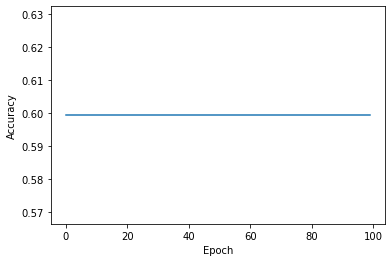

In [49]:
# Doğruluk oranı grafiği
plt.plot(accuracy_history)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [50]:
# Son doğruluğu yazdırın.

correct_prediction = tf.equal(tf.argmax(m, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test Accuracy: ", (sess.run(accuracy, feed_dict={x: X_test, y: Y_test})))

# Son ortalama kare hatasını yazdırın.

prediction = sess.run(m, feed_dict={x: X_test})
mse = tf.reduce_mean(tf.square(prediction - Y_test))
print("MSE: %.4f" % sess.run(mse))

Test Accuracy:  0.58181816
MSE: 2.2914


In [51]:
#Performans Ölçütleri
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
prediction=np.argmax(prediction, axis=1)
Y_test=np.argmax(Y_test, axis=1)
result1 = classification_report(Y_test, prediction)
print("Classification Report:",)
print (result1)
print("RMSE:")
print(np.sqrt(metrics.mean_squared_error(Y_test, prediction)))

Classification Report:
              precision    recall  f1-score   support

           0       0.58      1.00      0.74        96
           1       0.00      0.00      0.00        69

    accuracy                           0.58       165
   macro avg       0.29      0.50      0.37       165
weighted avg       0.34      0.58      0.43       165

RMSE:
0.6466697906828632


C:\Users\merve\anaconda3\envs\tensorflow_envr\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\merve\anaconda3\envs\tensorflow_envr\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\merve\anaconda3\envs\tensorflow_envr\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r